In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("placement.csv")
data.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
data = data.rename(columns={"resume_score":"score"})
data.head(3)

,cgpa,score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


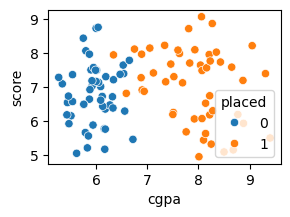

In [4]:
plt.figure(figsize=(3,2))
sns.scatterplot(x="cgpa", y="score", data=data, hue="placed")
plt.show()

In [5]:
x = data.iloc[:,:-1]
y = data["placed"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [10]:
lr.score(x_test,y_test)*100

100.0

# Confusion Metrix

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [12]:
# Compute confusion matrix
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[10,  0],
       [ 0, 10]], dtype=int64)

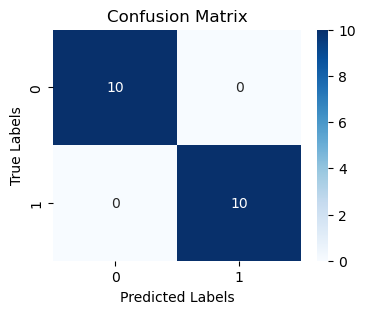

In [13]:
# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cf, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Precision

In [14]:
precision_score(y_test, lr.predict(x_test))*100

100.0

# Recall

In [15]:
recall_score(y_test, lr.predict(x_test))*100

100.0

# F1-Score

In [16]:
f1_score(y_test, lr.predict(x_test))*100

100.0